## Bike Sharing Assignment

### Introduction

- A Programming assignment to build a multiple linear regression model for the prediction of demand for shared bikes for a US bike-sharing provider BoomBikes

### Problem Statement
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:

- You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Steps for building and validating the model
- Data Preparation
- Model Building 
- Model Evaluation

In [417]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [418]:
## Importing the required libraries
import numpy as np
import pandas as pd
# Visulization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Import machine learing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
# FOR VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Step1: Preparing and Understanding the data

#### 1.1 Reading and Understanding the data

In [419]:
### Data Preparation
# Importing day.csv file into a dataframe
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [420]:
# Cheking if there are any null values in the data set or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [421]:
# Dropping the unnecessary dependent variables : instant , dteday, causal, registered
df = df.drop(["instant", "dteday", "casual", "registered"], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [422]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [423]:
# Now cheking the datatype of all the dependent variables once again
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [424]:
# Here upon closer inspection season, weathersit, mnth, weekday has int64 type and has values indicating some sort of order 
# Which is not the case hence converting these variables into string(object) form.

df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [425]:
# Defining a varible map fucntion for season, weathersit, mnth, weekday
# For season
def season_map(x):
    return x.map({ 1:'spring',  2:"summer", 3:'fall', 4:"winter" })

df[["season"]] = df[["season"]].apply(season_map)

# For weathersit 
def weathersit_map(x):
    return x.map({1:"clear", 2:"cloudy", 3:"light snow", 4:"rain"})
df[["weathersit"]] = df[["weathersit"]].apply(weathersit_map)

# For mnth
def mnth_map(x):
    return x.map({1:"Jan", 2:"Feb", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                  8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"})
df[["mnth"]] = df[["mnth"]].apply(mnth_map)

# For weekday
def weekday_map(x):
    return x.map({6:"Sat", 0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri"})
df[["weekday"]] = df[["weekday"]].apply(weekday_map)

# Once again cheking the datatype of all the variables 
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [426]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### 1.2 Visualizing the data using seaborn
- Creating a Pair Plot of all the numerical dependent variables of the dataset
- Creating Box Plots for all the categorical vairbles to see its distibution with respect to cnt 

### Pairplots

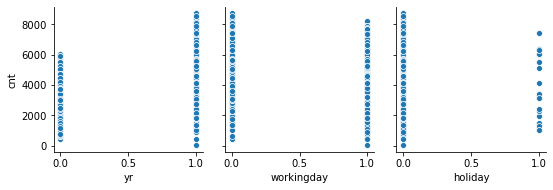

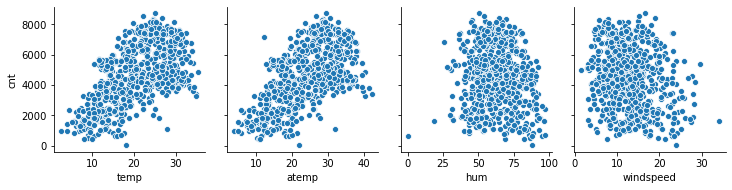

In [427]:
sns.pairplot(data=df, x_vars=["yr" ,"workingday", "holiday"], y_vars="cnt", )
sns.pairplot(data=df, x_vars=["temp", "atemp", "hum", "windspeed", ], y_vars="cnt", )
plt.show()

From the above pair plots we can see that temp and atemp has a bit of positive correlation with cnt

### Boxplots

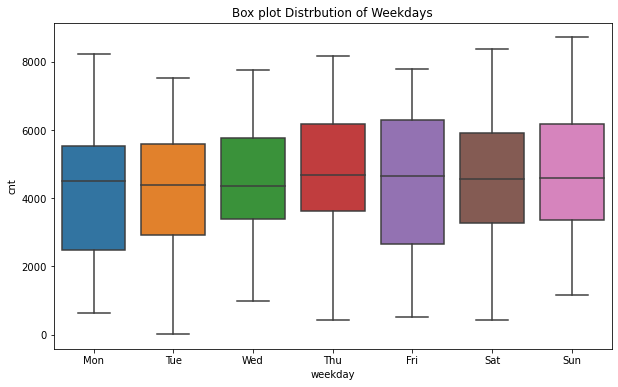

In [428]:
plt.figure(figsize=(10,6))
plt.title("Box plot Distrbution of Weekdays")
sns.boxplot(data=df, x="weekday", y="cnt")
plt.show()

There is not much of a significant things we can see in the weekday box plot and everyday they almost have the same meadian

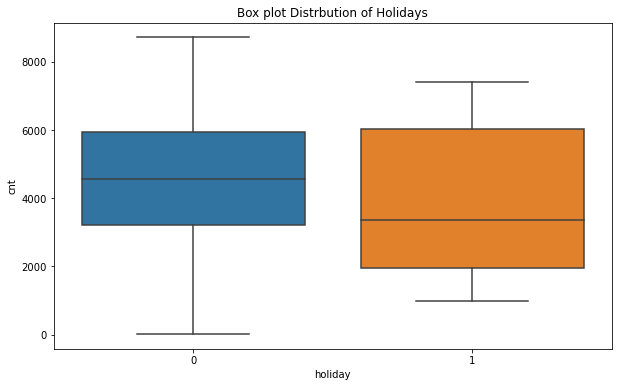

In [429]:
plt.figure(figsize=(10,6))
plt.title("Box plot Distrbution of Holidays")
sns.boxplot(data=df, x="holiday", y="cnt", )
plt.show()

It seems that the overall meadian of the cnt in holidays decreases where as the 25 is also higher in non-holidays

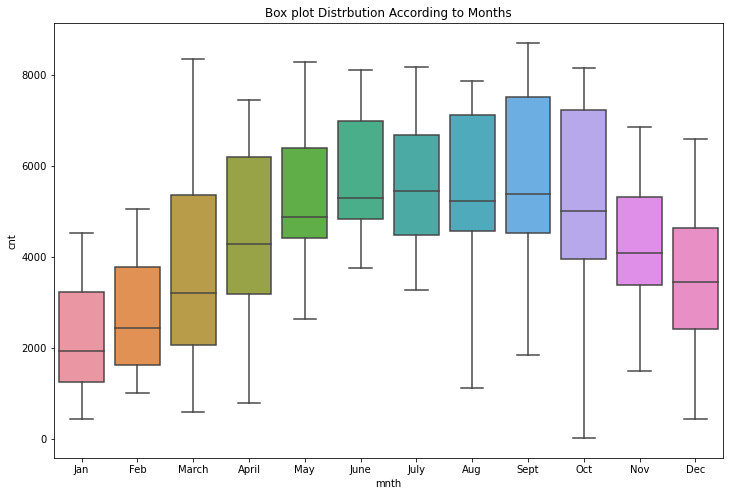

In [430]:
plt.figure(figsize=(12,8))
plt.title("Box plot Distrbution According to Months")
sns.boxplot(data=df, x="mnth", y="cnt")
plt.show()

Form the above box plot we can clearly see that the cnt clearly increses on the months between May and Sept

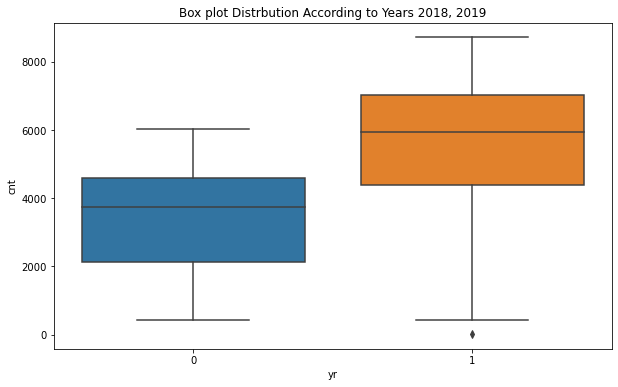

In [431]:
# yr : year (0: 2018, 1:2019)
plt.figure(figsize=(10,6))
plt.title("Box plot Distrbution According to Years 2018, 2019")
sns.boxplot(data=df, x="yr", y="cnt")
plt.show()

It seems that the cnt has been increased as compared to previous year

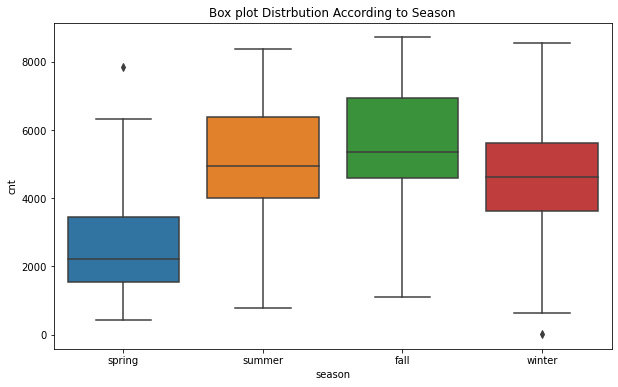

In [432]:
# Season : season (1:spring, 2:summer, 3:fall, 4:winter)
plt.figure(figsize=(10,6))
plt.title("Box plot Distrbution According to Season")
sns.boxplot( data=df, x="season", y="cnt" )
plt.show()

The cnt are particularly higher in summer and fall

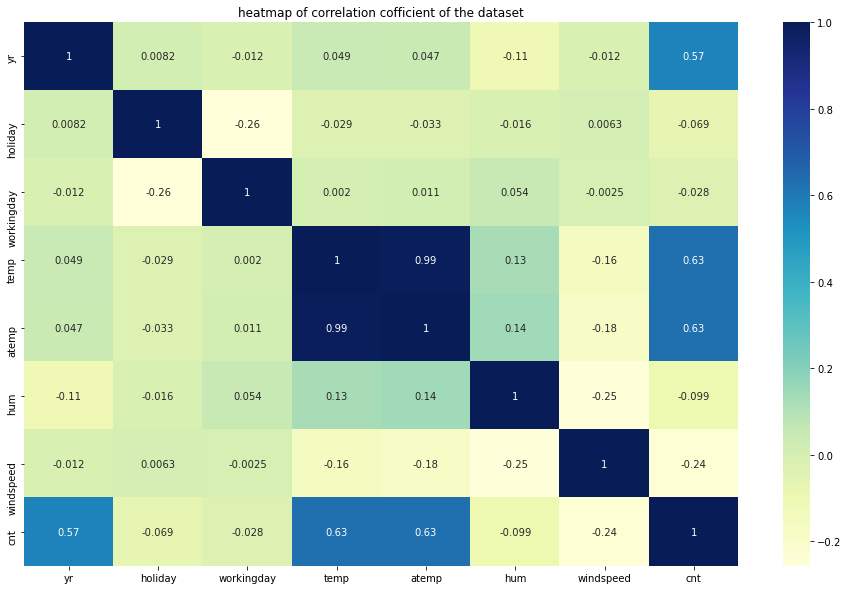

In [433]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title("heatmap of correlation cofficient of the dataset")
plt.show()

In [434]:
# From the corelation heatmap we can see that temp and atemp are very highly correlated , hence one becomes redundant
# Hence removing thee atemp independent variable
df = df.drop("atemp", axis=1)

In [435]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


### 1.3 Data Preparation 

#### 1.3.1 Dummy variables Converting season, mnth, weekday, weathersit  to dummy varibles

In [436]:
# First converting the season, mnth, weekday, weathersit from objject format to integer format using  
# Let's drop the first column from status df using 'drop_first = True'
season = pd.get_dummies(df['season'], drop_first = True)
month = pd.get_dummies(df['mnth'], drop_first = True)
weekday = pd.get_dummies(df['weekday'], drop_first = True)

# Adding the dummy varibles to the original dataframe df
df = pd.concat([df, season, month, weekday ], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [437]:
# Dropping the columns season, mnth, weekday, weathersit as we have created dummy variables for them
df = df.drop(["season", "mnth", "weekday", "weathersit"], axis=1)

#### 1.3.2 Splitting the data in train and test data

In [438]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train , df_test = train_test_split( df, test_size=0.33 , random_state=100 )

In [439]:
# Checking the shape of both the dataset
print( "Train data: ",df_train.shape)
print( "Test data: ",df_test.shape)

Train data:  (489, 27)
Test data:  (241, 27)


#### 1.3.3 Scaling the remaining numerical dependent variables using min-max scaler before feeding into the model e

In [440]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
659,1,0,1,19.987500,56.8333,5.459381,7058,0,0,1,...,0,0,1,0,0,0,0,0,1,0
696,1,0,1,12.163347,50.6250,14.125007,5260,0,0,1,...,0,1,0,0,0,0,0,1,0,0
320,0,0,0,14.008347,57.5833,20.459254,3053,0,0,1,...,0,1,0,0,0,1,0,0,0,0
534,1,0,1,28.221653,69.0000,9.917139,6825,0,1,0,...,0,0,0,0,0,0,0,0,0,1
136,0,0,1,23.028347,83.7917,18.582718,4123,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [441]:
# Creating an minmaxscaler object
scaler = MinMaxScaler()

# Numerical varibles except dummy and binary varibles
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [442]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
659,1,0,1,0.533770,0.585659,0.084227,0.809480,0,0,1,...,0,0,1,0,0,0,0,0,1,0
696,1,0,1,0.295982,0.521683,0.362278,0.602623,0,0,1,...,0,1,0,0,0,0,0,1,0,0
320,0,0,0,0.352054,0.593387,0.565523,0.348711,0,0,1,...,0,1,0,0,0,1,0,0,0,0
534,1,0,1,0.784017,0.711035,0.227262,0.782674,0,1,0,...,0,0,0,0,0,0,0,0,0,1
136,0,0,1,0.626185,0.863461,0.505311,0.471813,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [443]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.498978,0.026585,0.713701,0.534943,0.650422,0.322952,0.509005,0.249489,0.237219,0.253579,...,0.083845,0.087935,0.087935,0.077710,0.149284,0.134969,0.128834,0.141104,0.157464,0.137014
std,0.500511,0.161031,0.452494,0.227383,0.147496,0.170750,0.224377,0.433160,0.425813,0.435505,...,0.277438,0.283490,0.283490,0.267988,0.356733,0.342041,0.335360,0.348486,0.364611,0.344215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333364,0.537999,0.200531,0.350782,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.538962,0.653499,0.302129,0.514266,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.756977,0.417098,0.676829,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


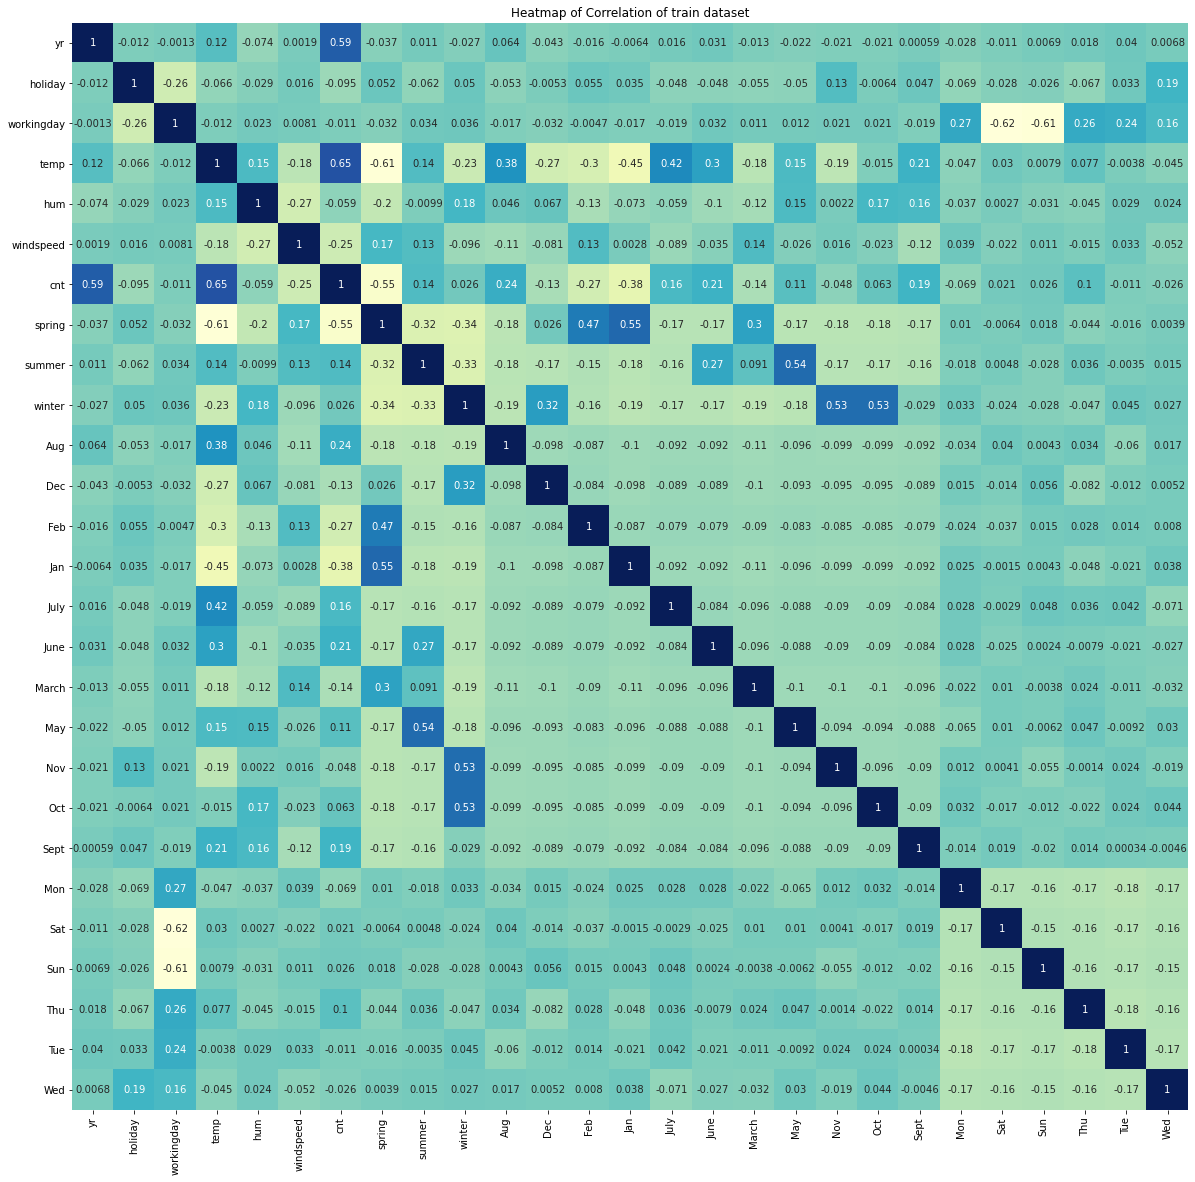

In [444]:
# Let's check the correlation coefficients to see which variables are highly correlated
# var = ["yr","holiday", "workingday", "temp","atemp","hum","windspeed", "cnt"]
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", cbar=False )
plt.title("Heatmap of Correlation of train dataset")
plt.show()

#### Here we can clearly see that temp, and yr are highly correlated with cnt 


In [445]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 659 to 520
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          489 non-null    int64  
 1   holiday     489 non-null    int64  
 2   workingday  489 non-null    int64  
 3   temp        489 non-null    float64
 4   hum         489 non-null    float64
 5   windspeed   489 non-null    float64
 6   cnt         489 non-null    float64
 7   spring      489 non-null    uint8  
 8   summer      489 non-null    uint8  
 9   winter      489 non-null    uint8  
 10  Aug         489 non-null    uint8  
 11  Dec         489 non-null    uint8  
 12  Feb         489 non-null    uint8  
 13  Jan         489 non-null    uint8  
 14  July        489 non-null    uint8  
 15  June        489 non-null    uint8  
 16  March       489 non-null    uint8  
 17  May         489 non-null    uint8  
 18  Nov         489 non-null    uint8  
 19  Oct         489 non-null   

In [446]:
### Dividing into X and y sets for model building 
### Seperating targer variable(cnt) from other depenedent variables
y_train = df_train.pop("cnt")
X_train = df_train

### 2.Building a linear Model using sklearn and statsmodel library and Feature Selection Using RFE

In [447]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [448]:
# Seeing the all the dependent variables and their ranks as per importance according to the RFE alogithm
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 8),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 4),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 5),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sept', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 11),
 ('Wed', False, 12)]

In [449]:
# Extracting the important columns after RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Feb', 'Jan', 'July', 'Sept', 'Sat', 'Sun'],
      dtype='object')

In [450]:
# Building a model using the following 15 variables using statsmodel for detailed analysis
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [451]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [452]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 
# And printing its summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.49e-165
Time:                        18:10:25   Log-Likelihood:                 456.97
No. Observations:                 489   AIC:                            -881.9
Df Residuals:                     473   BIC:                            -814.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4052      0.083      4.891      0.0

In [453]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,359.38
3,workingday,61.65
14,Sat,35.02
15,Sun,33.66
2,holiday,6.59
4,temp,3.20
7,summer,2.29
8,winter,2.27
12,July,2.07
9,Aug,2.05


In [454]:
# Working day has high pvalues and high VIF which makes it insignificant removing it first and repeating the process once again
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train, X_train_lm).fit()
print(lm_2.summary())


# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     154.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.54e-166
Time:                        18:10:25   Log-Likelihood:                 456.71
No. Observations:                 489   AIC:                            -883.4
Df Residuals:                     474   BIC:                            -820.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3503      0.031     11.302      0.0

In [455]:
# There is no multicolinearity as all the VIF are below 5 and mostly 2 also ,
# But Sat has a very high p values about 60% which makes it insignificant
# Hence drop Sat columns and rebuiling the model
X_train_new = X_train_lm.drop(["Sat"], axis = 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train, X_train_lm).fit()
print(lm_2.summary())


# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     166.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.12e-167
Time:                        18:10:25   Log-Likelihood:                 456.61
No. Observations:                 489   AIC:                            -885.2
Df Residuals:                     475   BIC:                            -826.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3515      0.031     11.391      0.0

In [456]:
# There is no multicolinearity as all the VIF are below 5 and mostly 2 also ,
# But Feb has a bit high p values about 17% which makes it insignificant
# Hence drop Sat columns and rebuiling the model
X_train_new = X_train_lm.drop(["Feb"], axis = 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train, X_train_lm).fit()
print(lm_3.summary())


# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     179.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.94e-168
Time:                        18:10:25   Log-Likelihood:                 455.64
No. Observations:                 489   AIC:                            -885.3
Df Residuals:                     476   BIC:                            -830.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3360      0.029     11.690      0.0

In [457]:
# There is no multicolinearity as all the VIF are below 5 and mostly 2 also ,
# But Sun has a very high p values about 15% which makes it insignificant
# Hence drop Sat columns and rebuiling the model
X_train_new = X_train_lm.drop(["Sun"], axis = 1)

# Build a fourth fitted model
X_train_lm = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train, X_train_lm).fit()
print(lm_4.summary())


# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.42e-169
Time:                        18:10:25   Log-Likelihood:                 454.62
No. Observations:                 489   AIC:                            -885.2
Df Residuals:                     477   BIC:                            -834.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3391      0.029     11.822      0.0

In [458]:
# There is no multicolinearity as all the VIF are below 5 and mostly 2 also ,
# But July has a very high p values about 15% which makes it insignificant
# Hence drop Sat columns and rebuiling the model
X_train_new = X_train_lm.drop(["July"], axis = 1)

# Build a fourth fitted model
X_train_lm = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train, X_train_lm).fit()
print(lm_5.summary())


# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.61e-169
Time:                        18:10:26   Log-Likelihood:                 453.40
No. Observations:                 489   AIC:                            -884.8
Df Residuals:                     478   BIC:                            -838.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3419      0.029     11.927      0.0

In [459]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [460]:
# The above model does not have any insignificant variables or any variables having high VIF values
# Also the Adjusted Rsquare and Rsquare values are also very close to each other about 80%
# So we are currently satisfied with the model
# Now extracting the final dependent variables in one list
final_col = X_train_new.columns.to_list()

### Residual Analysis on the train data

In [461]:
y_train_pred = lm_5.predict(X_train_lm)

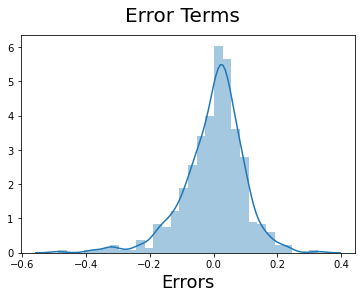

In [462]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)              
plt.show()

##### By looking at the above histogram we can say that the error terms are normally distributed

### 3 Predictions and Model Evaluation 

In [463]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
659,1,0,1,0.533770,0.585659,0.084227,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
696,1,0,1,0.295982,0.521683,0.362278,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
320,0,0,0,0.352054,0.593387,0.565523,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
534,1,0,1,0.784017,0.711035,0.227262,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
136,0,0,1,0.626185,0.863461,0.505311,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [464]:
# Applying scaling on the Numerical variables in the test dataset
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [465]:
# Dviding the test dataset in X_test , y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [466]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[final_col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [467]:
# Making predictions
y_pred = lm_5.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

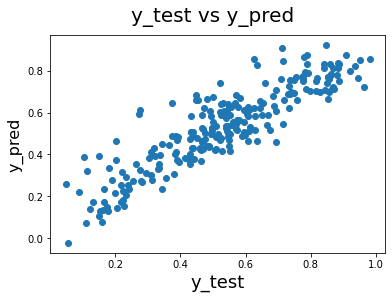

In [468]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                         

In [470]:
# Calculating the Rsquare of the test dataset 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.796687735703308

So we have a model with r2_score of 79 percentage..which is clearly close to the train r2_score hence we can say that the model is not overfit and is generalizing properly

We can see that the equation of our best fitted line is:

cnt = yt0.2303 - holiday0.0815 + temp0.5387 - hum0.3465 -windspeed0.241 + summer0.1002 + winter0.1363 + Aug0.0588 - Jan0.0330 + Sept0.1112